In [3]:
import yfinance as yf

# Laden der Daten für einen bestimmten Ticker (z. B. Apple)
ticker = "BTC-EUR"  # Ticker für Apple
data = yf.download(ticker, start="2014-09-17", end="2025-01-25", interval="1d")

# Daten speichern
data.to_csv("BTC-EUR.csv")

print("Daten erfolgreich heruntergeladen!")

[*********************100%***********************]  1 of 1 completed

Daten erfolgreich heruntergeladen!


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
bitcoin = pd.read_csv("BTC-EUR.csv", index_col="Date", parse_dates=True)   # nous permet d#agir sur les date en precisant index_col et parse_dates

In [123]:
bitcoin.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,355.957367,361.468506,351.586884,359.546204,16389166
2014-09-18,328.539368,355.505402,319.789459,355.588409,26691849
2014-09-19,307.761139,330.936707,298.921021,328.278503,29560103
2014-09-20,318.758972,329.978180,303.931244,307.665253,28736826
2014-09-21,310.632446,321.504517,306.502197,318.120514,20702625


In [125]:
bitcoin["Close"][2:3784]

Date
2014-09-19       307.761139
2014-09-20       318.758972
2014-09-21       310.632446
2014-09-22       312.958771
2014-09-23       339.189758
                  ...      
2025-01-20     98330.671875
2025-01-21     97881.210938
2025-01-22    101996.046875
2025-01-23     99589.351562
2025-01-24     99811.539062
Name: Close, Length: 3781, dtype: float64

<Axes: xlabel='Date'>

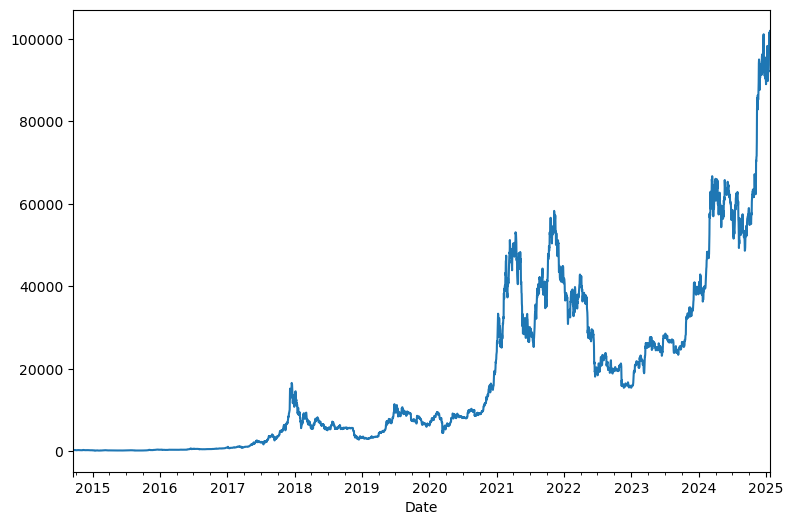

In [127]:
bitcoin["Close"].plot(figsize = (9,6))

In [128]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-18',
               '2025-01-19', '2025-01-20', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24'],
              dtype='datetime64[ns]', name='Date', length=3783, freq=None)

<Axes: xlabel='Date'>

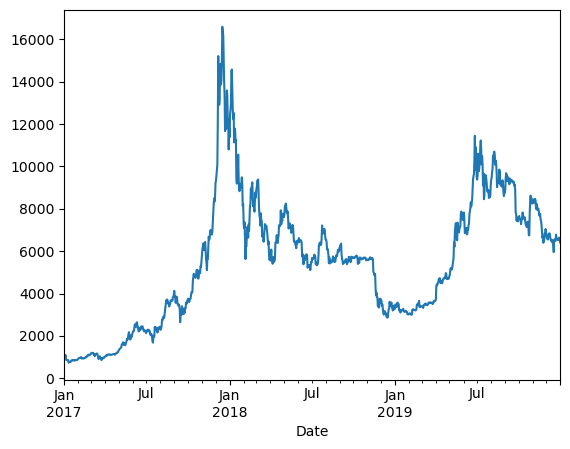

In [131]:
# Si on veut avoir l'evolution des bitcoin de 2017 a 2019
bitcoin.loc['2017':'2019', 'Close'].plot()

<Axes: xlabel='Date'>

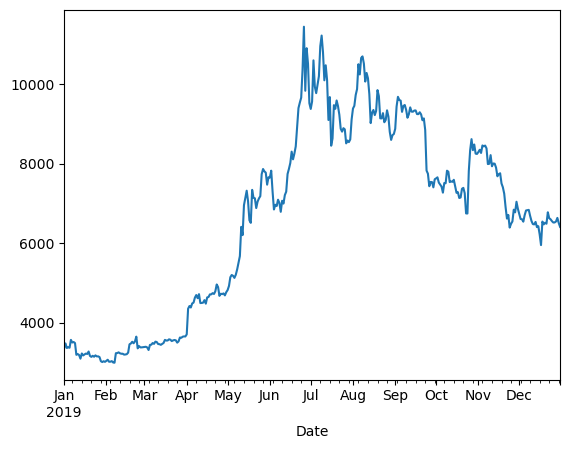

In [133]:
# Si on veut avoir l'evolution des bitcoin en 2019
bitcoin['2019':'2019']['Close'].plot()

In [135]:
# Si jamas il ya une autre forme de date utiliser la fonction : 
# pd.to_datetime('2019.09.03')

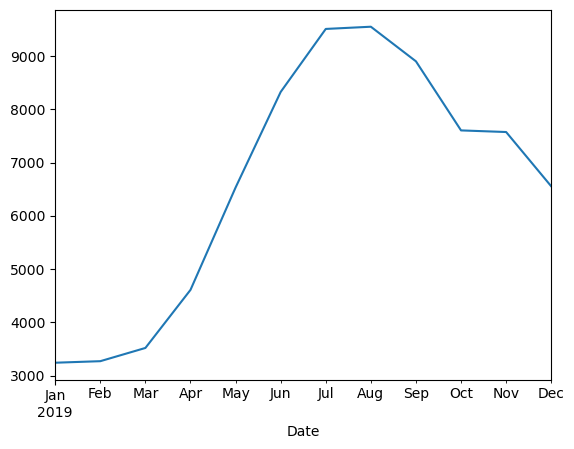

In [137]:
C= bitcoin.loc['2019', 'Close'].resample('ME').mean().plot()  # resample ici permet de regrouper les donnees en moyenne par mois avec resample(M)  
plt.show()

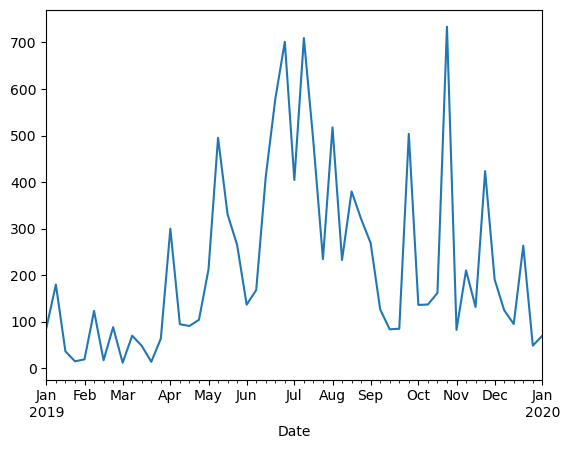

In [139]:
C= bitcoin.loc['2019', 'Close'].resample('W').std().plot()  # resample ici permet de regrouper les donnees ecart type par semaine avec resample(M)  
plt.show()  # l'ecart type montre a quel poit le bitcoin etait volatile en 2019

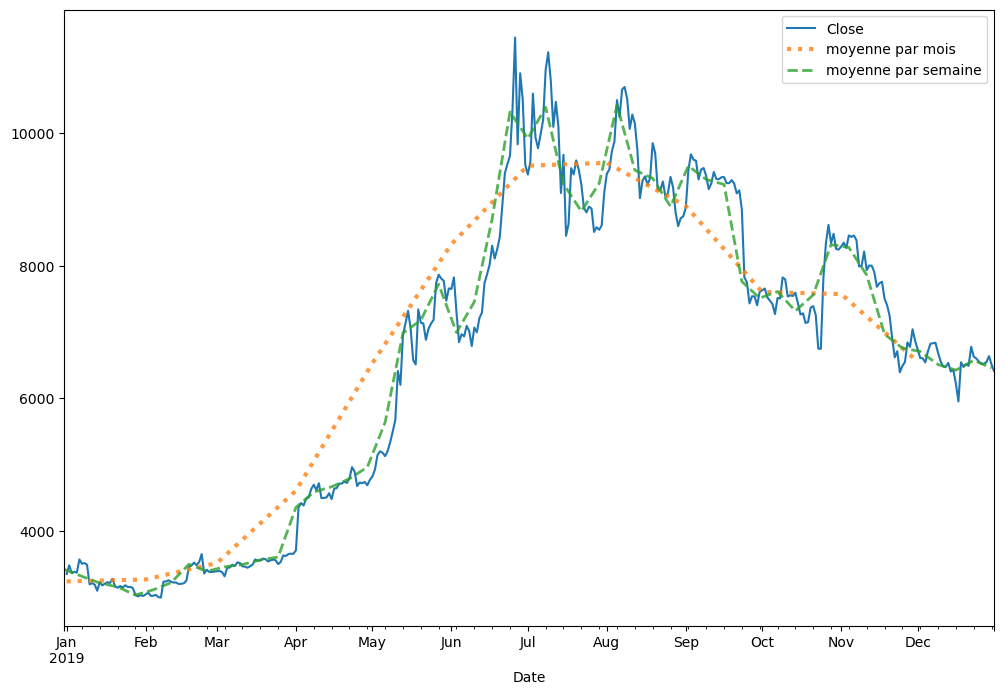

In [141]:
plt.figure(figsize=(12,8))
bitcoin.loc["2019", "Close"].plot()
bitcoin.loc["2019", "Close"].resample("ME").mean().plot(label="moyenne par mois", lw=3, ls=":", alpha=0.8)
bitcoin.loc["2019", "Close"].resample("W").mean().plot(label="moyenne par semaine", lw=2, ls="--", alpha=0.8)
plt.legend()
plt.show()

In [143]:
bitcoin.loc["2019", "Close"].resample("W").mean().agg(["mean", "std", "min", "max"])  # on met les differentes statistiques dans aggreagte

mean     6608.619354
std      2374.132802
min      3035.448347
max     10423.275112
Name: Close, dtype: float64

In [145]:
m = bitcoin.loc["2019", "Close"].resample("W").mean().agg(["mean", "std", "min", "max"])
plt.figure (figsize=(12, 8))
m["mean"]["2019"].plot(label="moyenne par semaine")
plt.fill_between(m.index, m["max"], m["min"], alpha=0.2, label= "min-max par semaine")
plt.legend()
plt.show()

IndexError: invalid index to scalar variable.

<Figure size 1200x800 with 0 Axes>

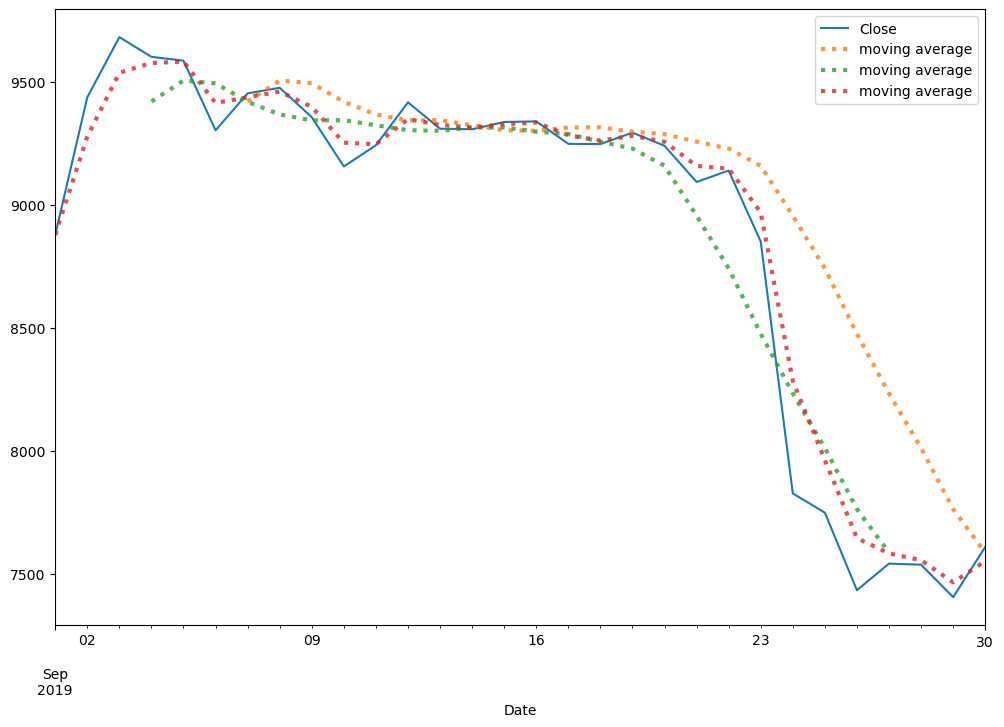

In [147]:
plt.figure (figsize=(12, 8))
bitcoin.loc["2019-09", "Close"].plot()
bitcoin.loc["2019-09","Close"].rolling(window = 7).mean().plot(label = "moving average", lw=3,  ls=":", alpha=0.8) # rolling definit une fenetre
bitcoin.loc["2019-09","Close"].rolling(window = 7, center = True).mean().plot(label = "moving average", lw=3,  ls=":", alpha=0.8)
bitcoin.loc["2019-09","Close"].ewm(alpha=0.6).mean().plot(label = "moving average", lw=3,  ls=":", alpha=0.8)
plt.legend()
plt.show()


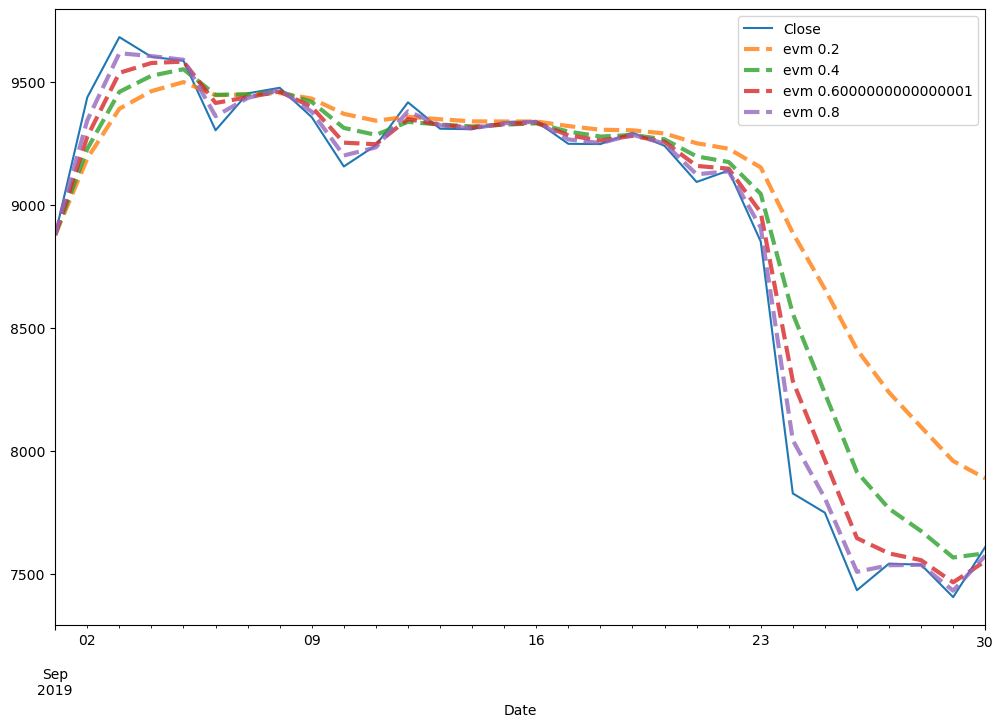

In [149]:
plt.figure (figsize=(12, 8))
bitcoin.loc["2019-09", "Close"].plot()
for i in np.arange(0.2,1,0.2):
    bitcoin.loc["2019-09","Close"].ewm(alpha=i).mean().plot(label = f"evm {i}", lw=3,  ls="--", alpha=0.8)
plt.legend()
plt.show()

In [151]:
import yfinance as yf

# Laden der Daten für einen bestimmten Ticker (z. B. Apple)
ticker = "ETH-EUR"  # Ticker für Apple
data = yf.download(ticker, start="2017-11-11", end="2025-01-25", interval="1d")

# Daten speichern
data.to_csv("ETH-EUR.csv")

print("Daten erfolgreich heruntergeladen!")

[*********************100%***********************]  1 of 1 completed

Daten erfolgreich heruntergeladen!


In [179]:
# on peut assembler le dataset n'ayant pas la meme longeur cest pas un probleme avec üanda
ethereum = pd.read_csv("ETH-EUR.csv", index_col = "Date", parse_dates = True)

<Axes: xlabel='Date'>

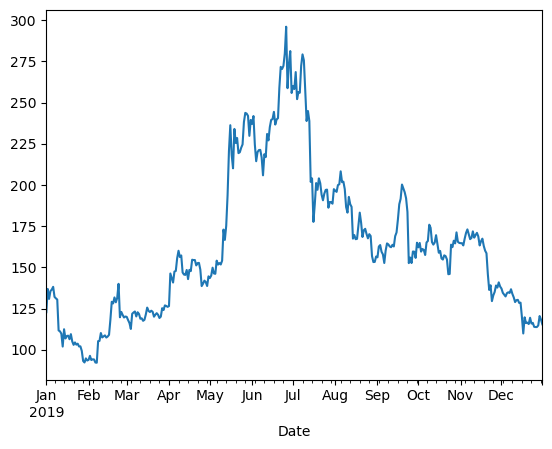

In [181]:
ethereum["2019":"2019"]["Close"].plot()

In [193]:
btc_eth = pd.merge(bitcoin, ethereum, on="Date", how="inner")  # inner assemble seulement les dataframes des dataset quils ont en commun
btc_eth.head()

,Close_x,High_x,Low_x,Open_x,Volume_x,Close_y,High_y,Low_y,Open_y,Volume_y
Date,,,,,,,,,,
2017-11-11,5451.084473,5893.123535,5319.574707,5674.877930,4208762919,269.811371,273.902954,255.673492,256.011322,722199256
2017-11-12,5102.976074,5680.399414,4732.066895,5397.796387,7682118257,264.072021,273.739624,255.948730,269.819092,1383773530
2017-11-13,5624.187988,5835.995117,5016.558105,5092.838867,5370187705,271.556213,281.949707,263.405121,263.314758,893329318
2017-11-14,5628.764160,5796.897949,5494.685547,5625.894043,2711943351,286.394958,290.873871,271.573212,271.596497,907354313
2017-11-15,6209.081543,6227.523438,5626.492188,5627.924316,3565506814,282.937531,289.079956,279.644714,286.677399,613364441


In [199]:
btc_eth.columns

Index(['Close_x', 'High_x', 'Low_x', 'Open_x', 'Volume_x', 'Close_y', 'High_y',
       'Low_y', 'Open_y', 'Volume_y'],
      dtype='object')

In [201]:
btc_eth.loc['Close_x', 'Close_y'].plot()

KeyError: 'Close_x'

In [173]:
data = bitcoin.copy()
data["Buy"] = np.zeros(bitcoin.shape[0])
data["Sell"]  = np.zeros(bitcoin.shape[0])
data["RollingMax"] = data["Close"].shift(1).rolling(window=28).max()
data["RollingMin"]  = data["Close"].shift(1).rolling(window=28).min()
data.loc[data["RollingMax"] < data["Close"], "Buy"] = 1
data.loc[data["RollingMin"] > data["Close"], "Sell"] = -1

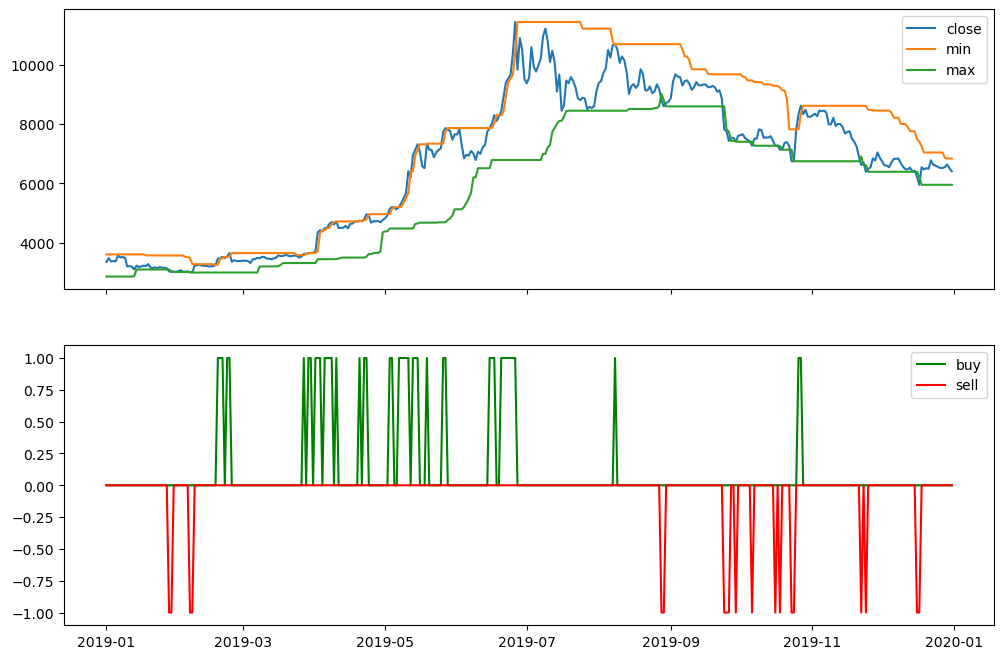

In [175]:
start = "2019"
end="2019"
fig,ax = plt.subplots(2, figsize=(12,8), sharex=True)

ax[0].plot(data["Close"][start:end])
ax[0].plot(data["RollingMax"][start:end])
ax[0].plot(data["RollingMin"][start:end])
ax[0].legend(["close","min", "max"])
ax[1].plot(data["Buy"][start:end], c="g")
ax[1].plot(data["Sell"][start:end], c="r")
ax[1].legend(["buy", "sell"])